In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,mean_squared_error
import seaborn as sns

In [2]:
df1 = pd.read_csv("house_prices.csv")
df1.head(2)

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Geo_Address,Lat,Lon
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara","Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246


In [59]:
df2 = df1.drop(['Title','Sub_title','Post_URL','Seller_name','published_date','Geo_Address','Address','Description'],axis='columns')
df2.head(11)

,Price,Baths,Land size,Beds,House size,Location,Seller_type,Lat,Lon
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",Member,80.500000,6.166670
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",Premium-Member,79.989929,6.877246
2,"Rs 20,000,000",2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha",Member,79.914926,6.951178
3,"Rs 187,000,000",5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo",Premium-Member,80.016670,6.866670
4,"Rs 1,300,000",1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo",Member,79.880242,6.838232
5,"Rs 55,000,000",4,11.0 perches,4,"3,300.0 sqft","Talawatugoda, Colombo",Premium-Member,80.016670,6.866670
6,"Rs 45,000,000",4,10.0 perches,4,"4,100.0 sqft","Kandy City, Kandy",Member,80.625828,7.295044
7,"Rs 16,700,000",3,9.0 perches,3,"1,400.0 sqft","Piliyandala, Colombo",Member,79.922703,6.801844
8,"Rs 50,000,000",4,10.0 perches,4,"4,000.0 sqft","Talawatugoda, Colombo",Premium-Member,80.016670,6.866670
9,"Rs 16,000,000",1,"3,000.0 perches",3,"2,000.0 sqft","Kadawatha, Gampaha",Premium-Member,79.951267,7.001966


In [60]:
df2.shape

(15327, 9)

In [61]:
df3= df2.copy()

In [62]:
df3['Land_size'] = df3['Land size'].apply(lambda x: (x.split(' ')[0]))
df3.head(2)

,Price,Baths,Land size,Beds,House size,Location,Seller_type,Lat,Lon,Land_size
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",Member,80.500000,6.166670,50.0
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",Premium-Member,79.989929,6.877246,8.0


In [63]:
df3['Price_n'] = df3['Price'].apply(lambda x: (x.split(' ')[1]))
df3.head(2)
#df3.Price_n.unique()

,Price,Baths,Land size,Beds,House size,Location,Seller_type,Lat,Lon,Land_size,Price_n
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",Member,80.500000,6.166670,50.0,"5,400,000"
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",Premium-Member,79.989929,6.877246,8.0,"16,800,000"


In [64]:
df3['House_size'] = df3['House size'].apply(lambda x: (x.split(' ')[0]))
df3.head(2)
#df3.House_size.unique()

,Price,Baths,Land size,Beds,House size,Location,Seller_type,Lat,Lon,Land_size,Price_n,House_size
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",Member,80.500000,6.166670,50.0,"5,400,000","1,600.0"
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",Premium-Member,79.989929,6.877246,8.0,"16,800,000","1,480.0"


In [65]:
df4 = df3.drop(['Price','House size','Land size'],axis='columns')
df4.head(1)

,Baths,Beds,Location,Seller_type,Lat,Lon,Land_size,Price_n,House_size
0,1,3,"Matara City, Matara",Member,80.5,6.16667,50.0,"5,400,000","1,600.0"


In [66]:
df4.dtypes

Baths           object
Beds            object
Location        object
Seller_type     object
Lat            float64
Lon            float64
Land_size       object
Price_n         object
House_size      object
dtype: object

In [96]:
df5= df4.copy()
df5['Price_n']=df5['Price_n'].str.replace(',','')
df5['House_size']=df5['House_size'].str.replace(',','')
df5['Land_size']=df5['Land_size'].str.replace(',','')
df5.head(1)

,Baths,Beds,Location,Seller_type,Lat,Lon,Land_size,Price_n,House_size
0,1,3,"Matara City, Matara",Member,80.5,6.16667,50.0,5400000,1600.0


In [97]:
df5.Baths.unique()

array(['1', '3', '2', '5', '4', '10+', '7', '6', '8', '10', '9'],
      dtype=object)

In [99]:
df5 = df5[~df5['Baths'].isin(['10+'])]
df5 = df5[~df5['Beds'].isin(['10+'])]
df5.Baths.unique()

array(['1', '3', '2', '5', '4', '6', '7', '8', '9', '10'], dtype=object)

In [100]:
df5['Price_n'] = df5['Price_n'].astype(float)
df5['Baths']=df5['Baths'].astype(str).astype(int)
df5['Beds']=df5['Beds'].astype(str).astype(int)
df5['Land_size']=df5['Land_size'].astype(float)
df5['House_size']=df5['House_size'].astype(float)

In [101]:
df5.dtypes

Baths            int32
Beds             int32
Location        object
Seller_type     object
Lat            float64
Lon            float64
Land_size      float64
Price_n        float64
House_size     float64
dtype: object

In [102]:
df5.isnull().sum()

Baths          0
Beds           0
Location       0
Seller_type    0
Lat            0
Lon            0
Land_size      0
Price_n        0
House_size     0
dtype: int64

In [104]:
(df5=='?').sum()

Baths          0
Beds           0
Location       0
Seller_type    0
Lat            0
Lon            0
Land_size      0
Price_n        0
House_size     0
dtype: int64

In [110]:
df5.duplicated().sum()

7493

In [115]:
df6=df5.copy()
df6.head(5)

,Baths,Beds,Location,Seller_type,Lat,Lon,Land_size,Price_n,House_size
0,1,3,"Matara City, Matara",Member,80.500000,6.166670,50.0,5400000.0,1600.0
1,3,3,"Athurugiriya, Colombo",Premium-Member,79.989929,6.877246,8.0,16800000.0,1480.0
2,2,3,"Kelaniya, Gampaha",Member,79.914926,6.951178,20.0,20000000.0,2800.0
3,5,5,"Colombo 6, Colombo",Premium-Member,80.016670,6.866670,22.0,187000000.0,4000.0
4,1,2,"Dehiwala, Colombo",Member,79.880242,6.838232,6.3,1300000.0,900.0


In [116]:
df6['Location_n'] = df6['Location'].apply(lambda x: (x.split(',')[0]))
df6.head(5)

,Baths,Beds,Location,Seller_type,Lat,Lon,Land_size,Price_n,House_size,Location_n
0,1,3,"Matara City, Matara",Member,80.500000,6.166670,50.0,5400000.0,1600.0,Matara City
1,3,3,"Athurugiriya, Colombo",Premium-Member,79.989929,6.877246,8.0,16800000.0,1480.0,Athurugiriya
2,2,3,"Kelaniya, Gampaha",Member,79.914926,6.951178,20.0,20000000.0,2800.0,Kelaniya
3,5,5,"Colombo 6, Colombo",Premium-Member,80.016670,6.866670,22.0,187000000.0,4000.0,Colombo 6
4,1,2,"Dehiwala, Colombo",Member,79.880242,6.838232,6.3,1300000.0,900.0,Dehiwala


In [178]:
df6['Location_n']=df6['Location_n'].str.replace(' ','')

In [179]:
#df3.location = df3.Location.apply(lambda x: x.strip())
location_stats = df6['Location_n'].value_counts(ascending=False)
location_stats

Piliyandala        2806
Malabe             1572
Negombo            1363
Talawatugoda       1296
Kottawa             750
                   ... 
Narammala            11
Balangoda            11
KegalleCity          11
NuwaraEliyaCity      11
BadullaCity          11
Name: Location_n, Length: 88, dtype: int64

In [180]:
location_stats.values.sum()

15269

In [181]:
len(location_stats[location_stats>10])

88

In [182]:
len(location_stats)

88

In [183]:
len(location_stats[location_stats<=10])

0

In [184]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Series([], Name: Location_n, dtype: int64)

In [185]:
len(df6.Location_n.unique())

88

In [186]:
df6.Location_n = df6.Location_n.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df6.Location_n.unique())

88

In [187]:
df6.head(1)

,Baths,Beds,Location,Seller_type,Lat,Lon,Land_size,Price_n,House_size,Location_n
0,1,3,"Matara City, Matara",Member,80.5,6.16667,50.0,5400000.0,1600.0,MataraCity


In [188]:
data= df6[['Price_n','Baths','Land_size','Beds','House_size']]

<AxesSubplot:>

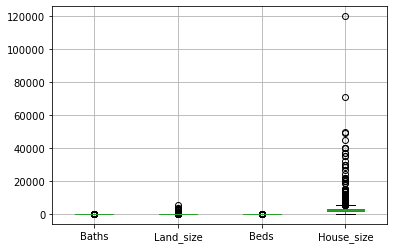

In [189]:
data.iloc[:,1:11].boxplot()

In [190]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

In [191]:
Q1

Price_n       16500000.0
Baths                2.0
Land_size            7.8
Beds                 3.0
House_size        1644.0
Name: 0.25, dtype: float64

In [192]:
Q3

Price_n       39000000.0
Baths                4.0
Land_size           14.0
Beds                 4.0
House_size        3250.0
Name: 0.75, dtype: float64

In [193]:
data.head(1)

,Price_n,Baths,Land_size,Beds,House_size
0,5400000.0,1,50.0,3,1600.0


In [194]:
IQR = Q3-Q1

In [195]:
Out_row = ((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)
Out_row

0         True
1        False
2        False
3         True
4        False
         ...  
15322    False
15323    False
15324    False
15325    False
15326     True
Length: 15269, dtype: bool

In [196]:
df7= df6[~Out_row]
df7.head(5)

,Baths,Beds,Location,Seller_type,Lat,Lon,Land_size,Price_n,House_size,Location_n
1,3,3,"Athurugiriya, Colombo",Premium-Member,79.989929,6.877246,8.0,16800000.0,1480.0,Athurugiriya
2,2,3,"Kelaniya, Gampaha",Member,79.914926,6.951178,20.0,20000000.0,2800.0,Kelaniya
4,1,2,"Dehiwala, Colombo",Member,79.880242,6.838232,6.3,1300000.0,900.0,Dehiwala
5,4,4,"Talawatugoda, Colombo",Premium-Member,80.016670,6.866670,11.0,55000000.0,3300.0,Talawatugoda
6,4,4,"Kandy City, Kandy",Member,80.625828,7.295044,10.0,45000000.0,4100.0,KandyCity


<AxesSubplot:>

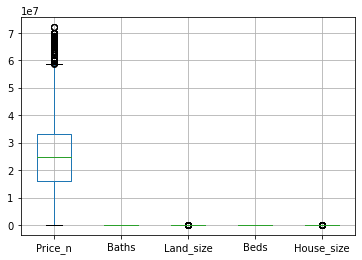

In [197]:
df7[['Price_n','Baths','Land_size','Beds','House_size']].boxplot()

In [198]:
dummies = pd.get_dummies(df7.Location_n)
dummies.head(3)

,Ambalangoda,Angoda,AnuradhapuraCity,Athurugiriya,BadullaCity,Balangoda,Bandaragama,Bandarawela,Batapola,Battaramulla,...,Rajagiriya,Ratmalana,RatnapuraCity,Seeduwa,Talawatugoda,Veyangoda,Wadduwa,Wattala,Wellampitiya,other
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
df8 = pd.concat([df7,dummies],axis='columns')
df8.head()

,Baths,Beds,Location,Seller_type,Lat,Lon,Land_size,Price_n,House_size,Location_n,...,Rajagiriya,Ratmalana,RatnapuraCity,Seeduwa,Talawatugoda,Veyangoda,Wadduwa,Wattala,Wellampitiya,other
1,3,3,"Athurugiriya, Colombo",Premium-Member,79.989929,6.877246,8.0,16800000.0,1480.0,Athurugiriya,...,0,0,0,0,0,0,0,0,0,0
2,2,3,"Kelaniya, Gampaha",Member,79.914926,6.951178,20.0,20000000.0,2800.0,Kelaniya,...,0,0,0,0,0,0,0,0,0,0
4,1,2,"Dehiwala, Colombo",Member,79.880242,6.838232,6.3,1300000.0,900.0,Dehiwala,...,0,0,0,0,0,0,0,0,0,0
5,4,4,"Talawatugoda, Colombo",Premium-Member,80.016670,6.866670,11.0,55000000.0,3300.0,Talawatugoda,...,0,0,0,0,1,0,0,0,0,0
6,4,4,"Kandy City, Kandy",Member,80.625828,7.295044,10.0,45000000.0,4100.0,KandyCity,...,0,0,0,0,0,0,0,0,0,0


In [228]:
df9 = df8.drop(['Location','Location_n','Seller_type','Lat','Lon'],axis='columns')
df9.head(2)

,Baths,Beds,Land_size,Price_n,House_size,Ambalangoda,Angoda,AnuradhapuraCity,Athurugiriya,BadullaCity,...,Rajagiriya,Ratmalana,RatnapuraCity,Seeduwa,Talawatugoda,Veyangoda,Wadduwa,Wattala,Wellampitiya,other
1,3,3,8.0,16800000.0,1480.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,20.0,20000000.0,2800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
#le= LabelEncoder()
#df9['Seller_type']=le.fit_transform(df9.Seller_type)
#df9.head(3)

,Baths,Beds,Seller_type,Lat,Lon,Land_size,Price_n,House_size,Ambalangoda,Angoda,...,Rajagiriya,Ratmalana,RatnapuraCity,Seeduwa,Talawatugoda,Veyangoda,Wadduwa,Wattala,Wellampitiya,other
1,3,3,1,79.989929,6.877246,8.0,16800000.0,1480.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,0,79.914926,6.951178,20.0,20000000.0,2800.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0,79.880242,6.838232,6.3,1300000.0,900.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
x = df9.drop(['Price_n'],axis='columns')
x.head(3)

,Baths,Beds,Land_size,House_size,Ambalangoda,Angoda,AnuradhapuraCity,Athurugiriya,BadullaCity,Balangoda,...,Rajagiriya,Ratmalana,RatnapuraCity,Seeduwa,Talawatugoda,Veyangoda,Wadduwa,Wattala,Wellampitiya,other
1,3,3,8.0,1480.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,20.0,2800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,6.3,900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [230]:
y = df9.Price_n
y.head(3)

1    16800000.0
2    20000000.0
4     1300000.0
Name: Price_n, dtype: float64

In [231]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                #'criterion':['gini'],
                'n_estimators': [25,50,100]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2,3],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

D:\softwares\anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4181180796859818e+17, tolerance: 190902202138103.2
  model = cd_fast.enet_coordinate_descent(
D:\softwares\anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4147172023909062e+17, tolerance: 192178304674796.25
  model = cd_fast.enet_coordinate_descent(
D:\softwares\anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3939006612072995e+17, tolerance: 192405668964389.97
  model = cd_fast.enet_coordinate_descent(
D:\softwares\anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceW

D:\softwares\anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4399182473978832e+17, tolerance: 193003731893490.6
  model = cd_fast.enet_coordinate_descent(
D:\softwares\anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.499014041694023e+17, tolerance: 191808876821011.47
  model = cd_fast.enet_coordinate_descent(
D:\softwares\anakonda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8788204277193286e+17, tolerance: 240131050013729.9
  model = cd_fast.enet_coordinate_descent(


,model,best_score,best_params
0,linear_regression,0.738136,{'normalize': False}
1,Random Forest,0.869220,{'n_estimators': 50}
2,lasso,0.738143,"{'alpha': 3, 'selection': 'cyclic'}"
3,decision_tree,0.802673,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [232]:
rf_uc = RandomForestRegressor(n_estimators= 100)
rf_uc.fit(x_train,y_train)
rf_uc.score(x_test,y_test)

0.8660697489335943

In [233]:
x.head(1)

,Baths,Beds,Land_size,House_size,Ambalangoda,Angoda,AnuradhapuraCity,Athurugiriya,BadullaCity,Balangoda,...,Rajagiriya,Ratmalana,RatnapuraCity,Seeduwa,Talawatugoda,Veyangoda,Wadduwa,Wattala,Wellampitiya,other
1,3,3,8.0,1480.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
x.columns

Index(['Baths', 'Beds', 'Land_size', 'House_size', 'Ambalangoda', 'Angoda',
       'AnuradhapuraCity', 'Athurugiriya', 'BadullaCity', 'Balangoda',
       'Bandaragama', 'Bandarawela', 'Batapola', 'Battaramulla',
       'BatticaloaCity', 'Boralesgamuwa', 'Chilaw', 'Colombo10', 'Colombo15',
       'Colombo3', 'Colombo4', 'Colombo5', 'Colombo6', 'Colombo8', 'Colombo9',
       'Dehiwala', 'Delgoda', 'Digana', 'Divulapitiya', 'Elpitiya',
       'GalleCity', 'GampahaCity', 'Gampola', 'Ganemulla', 'Godagama',
       'Hikkaduwa', 'Homagama', 'Horana', 'Ja-Ela', 'JaffnaCity', 'Kadawatha',
       'Kaduwela', 'KalutaraCity', 'Kandana', 'KandyCity', 'Karapitiya',
       'Katugastota', 'Katunayake', 'KegalleCity', 'Kelaniya', 'Kesbewa',
       'Kiribathgoda', 'Kohuwala', 'Kolonnawa', 'Kottawa', 'Kotte',
       'Kundasale', 'KurunegalaCity', 'Maharagama', 'Malabe', 'MataleCity',
       'MataraCity', 'Matugama', 'Mawanella', 'Meegoda', 'Minuwangoda',
       'Mirigama', 'Moratuwa', 'MountLavinia', 'Na

In [235]:
np.where(x.columns=='Wadduwa')[0][0]

87

In [271]:
def predict_Home_price(Baths,Beds,Land_size,House_size,location):    
    location_index = np.where(x.columns==location)[0][0]
    
    x1 = np.zeros(len(x.columns))
    x1[0] = Baths
    x1[1] = Beds
    x1[2] = Land_size
    x1[3] = House_size
    if location_index >= 0:
        x1[location_index] = 1
        

    return round(rf_uc.predict([x1])[0],2)
#return round(rf_uc.predict(x)[0],2)


In [272]:
predict_Home_price(2,2,10.0,2000.0,'Wellampitiya')

16939857.14

In [273]:
predict_Home_price(2,2,10.0,2000.0,'other')

14835000.0

In [275]:
import pickle
with open('House_price_prediction_model.pickle','wb') as f:
    pickle.dump(rf_uc,f)

In [276]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns_house.json","w") as f:
    f.write(json.dumps(columns))